## Advanced Imputation with Scikit-learn

///Objective: Use a more sophisticated imputation method from Scikit-learn to
handle missing values.//

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.impute import SimpleImputer,KNNImputer
import matplotlib.pyplot as plt


//Load Datasets://

In [2]:
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
print("original datasets are:\n",df.shape)
df.head()

original datasets are:
 (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
##Artifically added some missing values
np.random.seed(42)
df_missing=df.copy()
missing_rate=0.10
mask=np.random.rand(*df_missing.shape)<missing_rate
df_missing=df_missing.mask(mask)
print("Missing values added:\n")
print(df_missing.isnull().sum())


Missing values added:

MedInc        2045
HouseAge      2062
AveRooms      2132
AveBedrms     2112
Population    2039
AveOccup      2016
Latitude      2015
Longitude     2125
dtype: int64


///Split Data://

In [8]:
X_complete=df_missing.dropna()
X_missing=df_missing[df_missing.isnull().any(axis=1)]
print("Complete Rows:\n",X_complete.shape)
print("Rows with missing values:\n",X_missing.shape)

Complete Rows:
 (8798, 8)
Rows with missing values:
 (11842, 8)


** Imputataion with simpleimputer

In [9]:
Simple_imputer=SimpleImputer(strategy='median')
Simple_Imputed=Simple_imputer.fit_transform(df_missing)
df_simple=pd.DataFrame(Simple_Imputed,columns=df.columns)
print("\n SimpleImputer Done!")



 SimpleImputer Done!


**Imputation with KNNImputer

In [10]:
knn_imputer=KNNImputer(n_neighbors=5)
knn_imputed=knn_imputer.fit_transform(df_missing)
df_knn=pd.DataFrame(knn_imputed,columns=df.columns)
print("KNN imputer done!")

KNN imputer done!


///comparison://

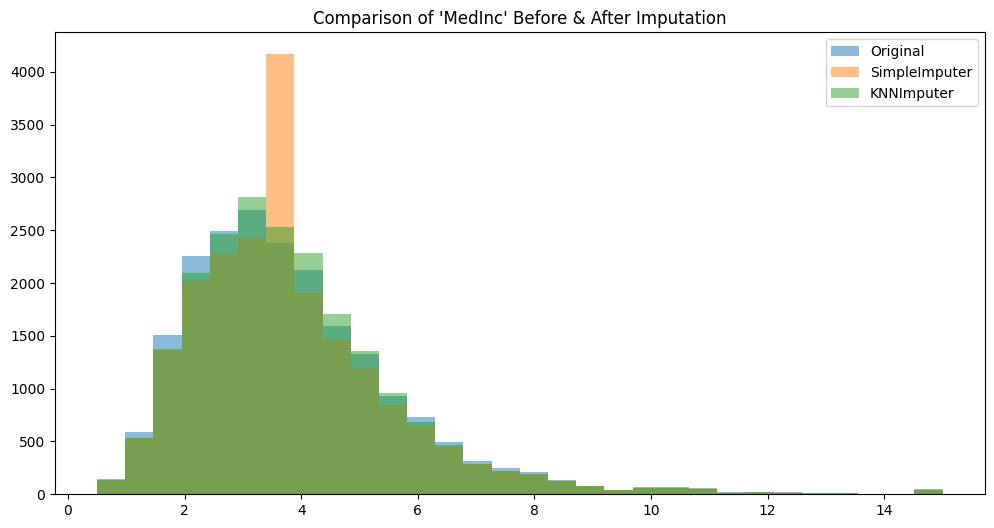

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df['MedInc'], bins=30, alpha=0.5, label="Original")
plt.hist(df_simple['MedInc'], bins=30, alpha=0.5, label="SimpleImputer")
plt.hist(df_knn['MedInc'], bins=30, alpha=0.5, label="KNNImputer")
plt.legend()
plt.title("Comparison of 'MedInc' Before & After Imputation")
plt.show()